In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname = "c:/windows/fonts/malgun.ttf").get_name()
rc('font', family = font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.metrics import mean_absolute_error, mean_squared_error

from pathlib import Path

result_path = str(Path.cwd().parent / "result")
data_path = str(Path.cwd().parent / "data")

In [2]:
data = pd.read_excel(f"{data_path}/dataset_HARX(14).xlsx")
result = pd.read_pickle(f"{result_path}/vix-forecast-py_241003.pkl")
print(result.keys())

dict_keys(['RF_prediction', 'XGB_prediction', 'RF_rmse', 'XGB_rmse', 'RF_mae', 'XGB_mae', 'RF_betas', 'XGB_betas'])


In [3]:
print(result["RF_prediction"].keys())

dict_keys([1, 5, 10, 22])


#### 결과 plot진행

In [4]:
y = data[["Code", 'lnVIX']].copy()
y.set_index("Code", inplace = True)

forecast_horizon = [1, 5, 10, 22]

In [5]:
result["RF_rmse"]

{1: 0.06513047377345564,
 5: 0.10409164710776017,
 10: 0.11842758597301112,
 22: 0.1413497146365162}

In [13]:
df

,lnVIX,VIX_pred_XGB_lag1,VIX_pred_XGB_lag5,VIX_pred_XGB_lag10,VIX_pred_XGB_lag22
2000-02-29,3.151453,3.220494,3.480112,3.354704,3.051219
2000-03-01,3.074543,3.181583,3.369302,3.160744,3.277626
2000-03-02,3.047376,3.091229,3.292919,3.252243,3.139198
2000-03-03,2.955431,3.079554,3.070564,3.200945,3.214679
2000-03-06,3.068053,2.958549,3.185928,3.197937,3.228674
...,...,...,...,...,...
2013-01-09,2.625393,2.693412,2.736150,2.768507,2.740909
2013-01-10,2.601949,2.627445,2.769213,2.812595,2.699925
2013-01-11,2.592265,2.618906,2.661092,2.764281,2.704753
2013-01-14,2.604170,2.647445,2.624747,2.836598,2.631834


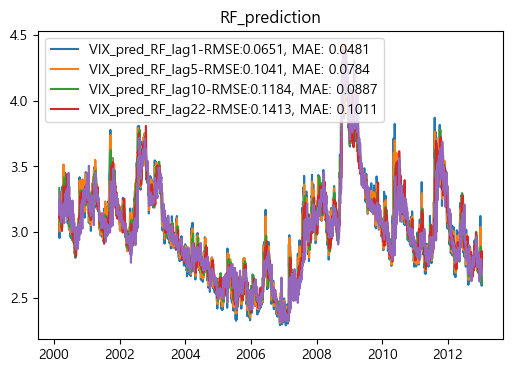

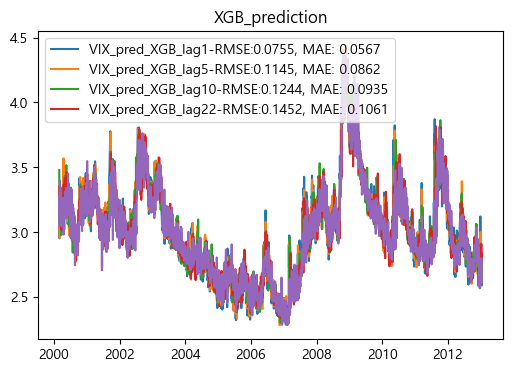

In [14]:
from functools import reduce

py_result = {}
for pred_type in ["RF_prediction", "XGB_prediction"]:

    df = []
    for h in forecast_horizon:
        tmp = result[pred_type][h].copy()
        df.append(tmp)

    df = reduce(lambda l, r: pd.merge(l, r, left_index = True, right_index = True), df)
    label_cols = df.columns

    new_label_cols = []
    for col, h in zip(label_cols, forecast_horizon):
        if pred_type == "RF_prediction":
            new_label_cols.append(f'{col}-RMSE:{result["RF_rmse"][h]:.4f}, MAE: {result["RF_mae"][h]:.4f}')
        else:
            new_label_cols.append(f'{col}-RMSE:{result["XGB_rmse"][h]:.4f}, MAE: {result["XGB_mae"][h]:.4f}')

    df.insert(0, "lnVIX", y)

    py_result[pred_type] = df
    

    f, ax = plt.subplots(1, 1, figsize = (6,4))

    
    ax.plot(df)
    ax.set_title(f"{pred_type}")

    ax.legend(new_label_cols, loc = "best")

plt.show()

In [22]:
r_result = pd.read_excel("../NewResults.xlsx")
r_result.set_index(py_result["RF_prediction"].index, inplace = True)

for idx, pred_type in enumerate(py_result.keys()):

    tmp = py_result[pred_type].copy()

    if idx == 0:
        true_y = tmp[["lnVIX"]].copy()

    tmp.drop(columns = "lnVIX", inplace = True)
        

    for col in tmp.columns[::-1]:
        r_result.insert(0, col, tmp[col])

In [24]:
r_result.insert(0, "lnVIX", true_y)

In [25]:
fin_result = r_result.copy()

In [27]:
for col in fin_result.columns[1:]:

    print(f'{col}-RMSE: {mean_squared_error(fin_result["lnVIX"], fin_result[col], squared = False):.4f}, MAE: {mean_absolute_error(fin_result["lnVIX"], fin_result[col]):.4f}')


VIX_pred_XGB_lag1-RMSE: 0.0755, MAE: 0.0567
VIX_pred_XGB_lag5-RMSE: 0.1145, MAE: 0.0862
VIX_pred_XGB_lag10-RMSE: 0.1244, MAE: 0.0935
VIX_pred_XGB_lag22-RMSE: 0.1452, MAE: 0.1061
VIX_pred_RF_lag1-RMSE: 0.0651, MAE: 0.0481
VIX_pred_RF_lag5-RMSE: 0.1041, MAE: 0.0784
VIX_pred_RF_lag10-RMSE: 0.1184, MAE: 0.0887
VIX_pred_RF_lag22-RMSE: 0.1413, MAE: 0.1011
rw1-RMSE: 0.0630, MAE: 0.0458
rw5-RMSE: 0.1190, MAE: 0.0891
rw10-RMSE: 0.1479, MAE: 0.1115
rw22-RMSE: 0.2067, MAE: 0.1540
harx1-RMSE: 0.0629, MAE: 0.0458
harx5-RMSE: 0.0708, MAE: 0.0525
harx10-RMSE: 0.0798, MAE: 0.0597
harx22-RMSE: 0.1122, MAE: 0.0835
har1-RMSE: 0.0622, MAE: 0.0454
har5-RMSE: 0.0668, MAE: 0.0496
har10-RMSE: 0.0717, MAE: 0.0534
har22-RMSE: 0.0912, MAE: 0.0681
arx1-RMSE: 0.0628, MAE: 0.0456
arx5-RMSE: 0.0694, MAE: 0.0513
arx10-RMSE: 0.0764, MAE: 0.0576
arx22-RMSE: 0.1033, MAE: 0.0789
rf1_14-RMSE: 0.0653, MAE: 0.0484
rf5_14-RMSE: 0.0840, MAE: 0.0639
rf10_14-RMSE: 0.0988, MAE: 0.0759
rf22_14-RMSE: 0.1415, MAE: 0.1084
